In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.datasets import imdb #cargo los datos del imdb
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


In [2]:
def randomize(x,y):
    #x matriz de datos (datos x dimension)
    #y matriz de datos verdaderos (datos x categorias)
    indices = np.random.choice(x.shape[0], x.shape[0], replace=False)
    x = x[indices]
    y = y[indices]
    return x,y

In [3]:
#reshape como quiero a la data de la bd IMDB
def reshapeData(x_total,y_total,n_palabras):
    y = to_categorical(y_total) #queda dimensiones reviews x 2
    x = np.zeros((len(x_total), n_palabras)) #queda dimensiones reviews x n_palabras
    for i, x_total in enumerate(x_total):
        x[i, x_total] = 1 #un 1 en posicion en la que hay una palabra, queda cero en otro caso
    return x,y

In [4]:
def separateData(x_total,y_total):
    n_review = y_total.shape[0]
    n_train = int(n_review * 0.75) #cantidad de datos de train
    x_total, y_total = randomize(x_total,y_total)
    x_train = x_total[:n_train,:]
    y_train = y_total[:n_train]
    x_test = x_total[n_train:,:]
    y_test = y_total[n_train:]
    return x_train,y_train,x_test,y_test

# ejercicio 4 con capas densas

In [5]:
#cargo los datos como dice en el enunciado
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000) #solo las 10k palabras mas frecuentes en reviews 
                                                                         #asi que hay 10k palabras posibles por review

C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
#junto todos los datos para reformatear y separar bien despues como en los otros ejercicios
x_total = np.hstack((x_train,x_test)) #lista de palabras de reviews de las peliculas codificadas segun diccionario
y_total = np.hstack((y_train,y_test)) #calificacion positiva (1) o calificacion negativa (0)
n_palabras = 10000 #cantidad de palabras posibles

In [7]:
#defino algunas constantes que son utiles, las mismas de los problemas del ejercicio 2
n_capa1 = 100  
n_capa2 = 10 
n_capa3 = 2
lr = 5e-2
rg = 1e-3
dprate = 0.5
epocas = 100 #cantidad de epocas

In [8]:
#padding antes del embedding
max_length = 500
n_embedding = 100
x_total= keras.preprocessing.sequence.pad_sequences(x_total,maxlen=max_length,padding='post',truncating='post') #padding the data like requested

In [9]:
y_total = to_categorical(y_total) #to categorical bc n_capa3 = 2 (could be done another way but idk this how i did it)
x_train,y_train,x_test,y_test = separateData(x_total,y_total) #separo en datos de train y test

In [10]:
#entonces puedo proceder a armar la red neuronal parecido al ejercicio anterior
#porque el formato de los datos es el mismo
x = keras.layers.Input(shape=(x_total.shape[1],)) #capa de input
e = keras.layers.Embedding(n_palabras,n_embedding,input_length=max_length)(x)
f = keras.layers.Flatten()(e)
l1 = keras.layers.Dense(units=n_capa1, activation='relu',kernel_regularizer=keras.regularizers.l2(rg))(f)
l2 = keras.layers.Dense(units=n_capa2, activation='relu',kernel_regularizer=keras.regularizers.l2(rg))(l1)
l3 = keras.layers.Dense(units=n_capa3, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(rg))(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])
#plot_model(model,to_file='ej4_1.pdf',show_shapes = True,rankdir='LR')
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=100, verbose=2)

C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37500 samples, validate on 12500 samples
Epoch 1/100
 - 4s - loss: 0.9055 - acc: 0.5093 - val_loss: 0.8975 - val_acc: 0.5097
Epoch 2/100
 - 4s - loss: 0.8898 - acc: 0.5193 - val_loss: 0.8825 - val_acc: 0.5164
Epoch 3/100
 - 4s - loss: 0.8753 - acc: 0.5249 - val_loss: 0.8686 - val_acc: 0.5219
Epoch 4/100
 - 4s - loss: 0.8618 - acc: 0.5333 - val_loss: 0.8557 - val_acc: 0.5246
Epoch 5/100
 - 4s - loss: 0.8493 - acc: 0.5365 - val_loss: 0.8437 - val_acc: 0.5302
Epoch 6/100
 - 4s - loss: 0.8375 - acc: 0.5378 - val_loss: 0.8326 - val_acc: 0.5462
Epoch 7/100
 - 4s - loss: 0.8265 - acc: 0.5430 - val_loss: 0.8221 - val_acc: 0.5310
Epoch 8/100
 - 4s - loss: 0.8162 - acc: 0.5418 - val_loss: 0.8123 - val_acc: 0.5657
Epoch 9/100
 - 4s - loss: 0.8063 - acc: 0.5551 - val_loss: 0.8031 - val_acc: 0.5737
Epoch 10/100
 - 4s - loss: 0.7968 - acc: 0.5646 - val_loss: 0.7936 - val_acc: 0.5802
Epoch 11/100
 - 4s - loss: 0.7870 - acc: 0.5848 - val_loss: 0.7842 - val_acc: 0.5554
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.3831 - acc: 0.9893 - val_loss: 0.5422 - val_acc: 0.8105
Epoch 98/100
 - 4s - loss: 0.3829 - acc: 0.9891 - val_loss: 0.5415 - val_acc: 0.8098
Epoch 99/100
 - 4s - loss: 0.3827 - acc: 0.9895 - val_loss: 0.5415 - val_acc: 0.8091
Epoch 100/100
 - 4s - loss: 0.3823 - acc: 0.9896 - val_loss: 0.5416 - val_acc: 0.8094


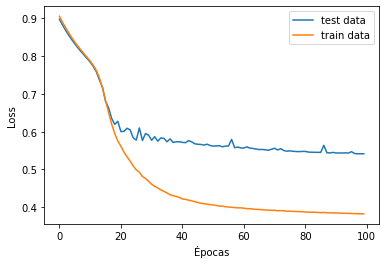

In [14]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej4_1_lossepo_cce.pdf')

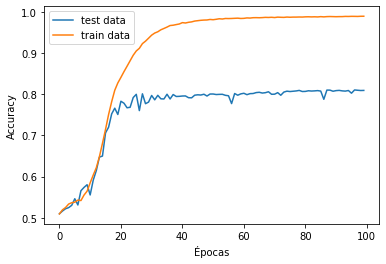

In [13]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej4_1_lossacc_cce.pdf')

# ejercicio 4 con capas convolucionales

In [ ]:
#cargo los datos como dice en el enunciado
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000) #solo las 10k palabras mas frecuentes en reviews 
                                                                         #asi que hay 10k palabras posibles por review

In [ ]:
#junto todos los datos para reformatear y separar bien despues como en los otros ejercicios
x_total = np.hstack((x_train,x_test)) #lista de palabras de reviews de las peliculas codificadas segun diccionario
y_total = np.hstack((y_train,y_test)) #calificacion positiva (1) o calificacion negativa (0)
y_total = to_categorical(y_total)
n_palabras = 10000 #cantidad de palabras posibles

In [ ]:
#padding y separar los datos
max_length = 500
n_embedding = 64
x_total= keras.preprocessing.sequence.pad_sequences(x_total,maxlen=max_length,padding='post') #padding the data like requested
x_train,y_train,x_test,y_test = separateData(x_total,y_total)

In [ ]:
#algunas constantes importantes para la red
epocas = 150
cnn1_f = 64
cnn1_ks = 3
lr = 5e-2

In [ ]:
#embeddings
model = keras.Sequential()
model.add(keras.layers.Embedding(n_palabras,n_embedding,input_length=max_length))
model.add(keras.layers.Conv1D(cnn1_f, cnn1_ks,padding='valid', activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(2, activation='sigmoid'))
optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer, loss=keras.losses.MSE, metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epocas, validation_data=(x_test, y_test),batch_size=100, verbose=2)

In [ ]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej4_2_lossepoch.pdf')

In [ ]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej4_2_accloss.pdf')